# CelebA GAN 0.7

Changes:
  - Correct 0.5/255 scaling of input or output
  - Adam optimiser beta_1 set to 0.45 (closer to value used in well-performing models)


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.32G/1.33G [00:15<00:00, 97.5MB/s]
100% 1.33G/1.33G [00:15<00:00, 91.9MB/s]


In [4]:
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [5]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import fashion_mnist

import pickle

import CelebA

In [42]:
reload(CelebA)
reload(gan)

<module 'gan' from '/content/gan.py'>

In [53]:
BATCH_SIZE = 64
real_gen = CelebA.gen_real_img_batch("img_align_celeba",
                                     batch_size=BATCH_SIZE,
                                     positive_label=0.9)

In [46]:
reload(gan)
reload(CelebA)

<module 'CelebA' from '/content/CelebA.py'>

In [51]:
clear_session()
model = gan.GAN(x_shape=(32, 32, 3), kernal_size=5, verbose=True, lr=(1e-4, 2e-4),
                min_filters_gen=128, min_filters_discr=64,
                num_blocks=3)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16384)             1654784   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 512)         13107200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 512)         20

In [48]:
from glob import glob
total_real = len(glob("img_align_celeba/img_align_celeba/*.jpg"))
total_real

202599

In [49]:
reload(CelebA)

<module 'CelebA' from '/content/CelebA.py'>

Found 202599 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


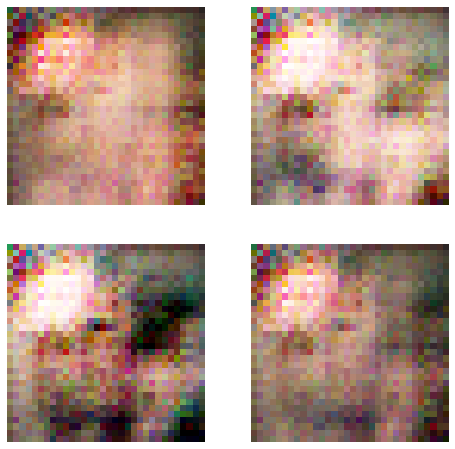

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


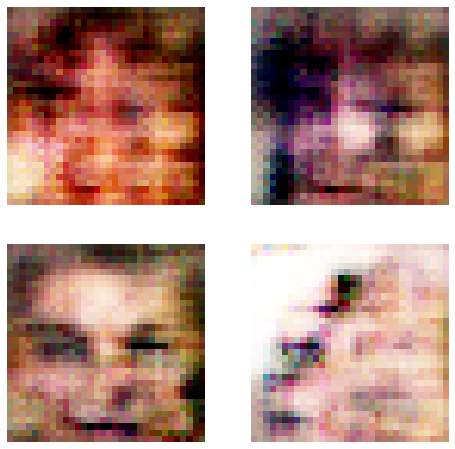

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


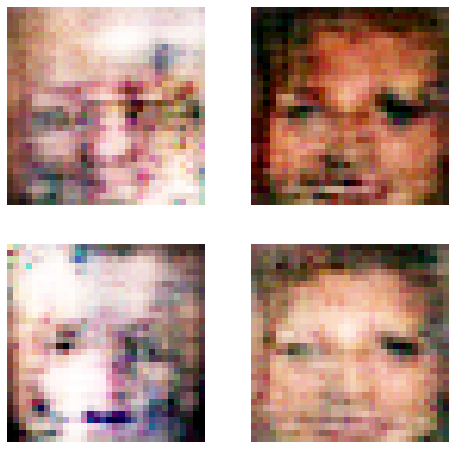

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


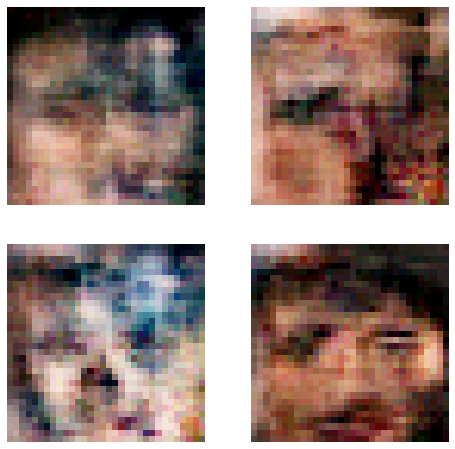

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


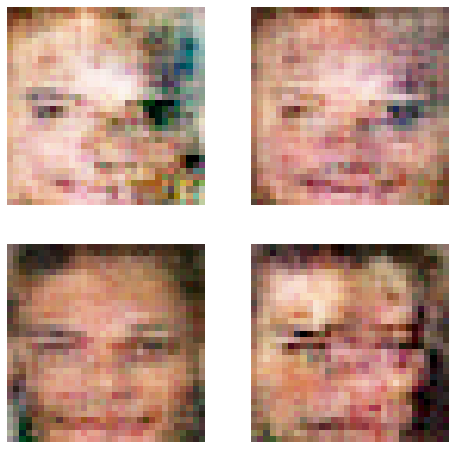

In [ ]:
model.train(real_gen, num_epochs=10, batch_size=BATCH_SIZE, labels=(0, 0.9),
            total_real=total_real,
            progress_frac=0.5,
            postproc_func=CelebA.postproc_imgs)

In [ ]:
model.save("celebA_gan", model_dir="celebA_model")

In [ ]:
files.download("celebA_gan")
files.download("celebA_model")